In [30]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = load_iris()

In [6]:
X = data.data
y = data.target

In [7]:
X.shape, y.shape

((150, 4), (150,))

In [9]:
df = pd.DataFrame(X)

In [10]:
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
X.shape

(150, 4)

In [15]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
target = data.target

In [21]:
sum(target == 0)

np.int64(50)

In [26]:
sum(target == 1) / 150

np.float64(0.3333333333333333)

In [24]:
sum(target == 2)

np.int64(50)

In [25]:
len(X)

150

In [28]:
X[:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

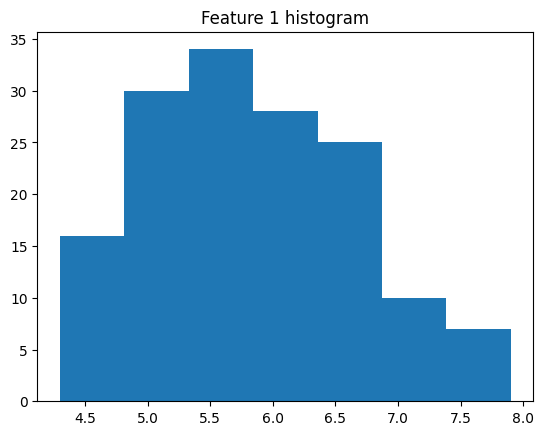

In [40]:
plt.hist(X[:,0], bins=7)
plt.title('Feature 1 histogram')
plt.show()

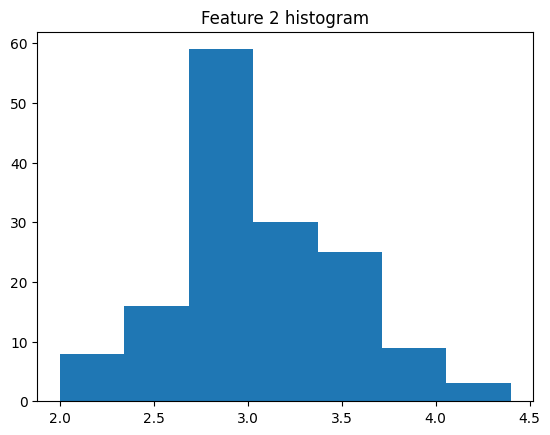

In [46]:
plt.hist(X[:,1], bins=7)
plt.title('Feature 2 histogram')
plt.show()

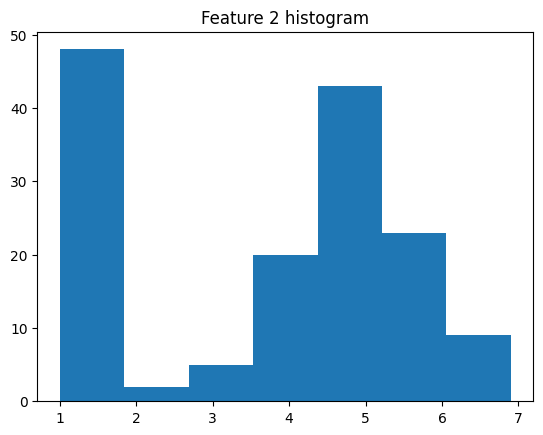

In [44]:
plt.hist(X[:,2], bins=7)
plt.title('Feature 2 histogram')
plt.show()

In [47]:
class GaussianNB:
    """Continuous data → Gaussian Naive Bayes"""
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.total_len = len(X)
        self.classes = np.unique(y)
        
        # Prior Prob
        self.priors = {c: np.mean(y == c) for c in self.classes}
        
        # Parameters of Gaussian
        self.means = {}
        self.vars = {}
        for c in self.classes:
            X_c = X[y == c]
            self.means[c] = np.mean(X_c, axis=0)   # mean per feature
            self.vars[c] = np.var(X_c, axis=0)     # variance per feature

    def gaussian_pdf(self, x, mean, var):
        eps = 1e-6
        coeff = 1.0 / np.sqrt(2 * np.pi * (var + eps))
        exponent = np.exp(-(x - mean) ** 2 / (2 * (var + eps)))
        return coeff * exponent
    
    def predict_one(self, x):
        posteriors = {}
        for c in self.classes:
            # log - no underflow ers
            log_posterior = np.log(self.priors[c])
            # final add
            log_posterior += np.sum(np.log(self.gaussian_pdf(x, self.means[c], self.vars[c])))
            posteriors[c] = log_posterior
        return max(posteriors, key=posteriors.get)
    
    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])


In [48]:
class TestReport:
    def __init__(self):
        pass

    @staticmethod
    def get_report(pred, actual):
        pred = np.array(pred)
        actual = np.array(actual)

        accuracy = np.mean(pred == actual)

        classes = np.unique(actual)
        report = {"accuracy": accuracy}

        for c in classes:
            tp = np.sum((pred == c) & (actual == c))
            fp = np.sum((pred == c) & (actual != c))
            fn = np.sum((pred != c) & (actual == c))

            precision = tp / (tp + fp + 1e-6)
            recall = tp / (tp + fn + 1e-6)
            f1 = 2 * precision * recall / (precision + recall + 1e-6)

            report[c] = {
                "precision": precision,
                "recall": recall,
                "f1": f1
            }

        return report
